**Problem Statement:**

**In the context of rapid urbanization and economic development, understanding and forecasting the economic productivity of cities is crucial for strategic planning and policy-making. This project focuses on analyzing and predicting the Gross Domestic Product (GDP) growth of major Indian cities from 2019 to 2023. 
The goal is to provide actionable insights into how different economic sectors contribute to overall GDP growth and to forecast future trends based on historical data.*

In [33]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('GDP_Sector_Income_2019_2023_30Cities.csv')

In [43]:
#Checking the first few rows to get a sense of the data:
df.head()


,City,Year,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%),Agriculture (in billion $),Industry (in billion $),Services (in billion $),Technology (in billion $)
0,Ahmedabad,2019,187.2,15.7,32.1,40.9,20.6,29.3904,60.0912,76.5648,38.5632
1,Ahmedabad,2020,211.5,11.6,37.8,49.3,19.6,24.5340,79.9470,104.2695,41.4540
2,Ahmedabad,2021,247.9,12.9,31.4,48.5,11.8,31.9791,77.8406,120.2315,29.2522
3,Ahmedabad,2022,71.8,5.3,36.7,45.6,31.8,3.8054,26.3506,32.7408,22.8324
4,Ahmedabad,2023,294.7,17.0,29.2,45.6,13.0,50.0990,86.0524,134.3832,38.3110


In [44]:
#Checking the structure of the dataset:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        150 non-null    object 
 1   Year                        150 non-null    int32  
 2   GDP (in billion $)          150 non-null    float64
 3   Agriculture (%)             150 non-null    float64
 4   Industry (%)                150 non-null    float64
 5   Services (%)                150 non-null    float64
 6   Technology (%)              150 non-null    float64
 7   Agriculture (in billion $)  150 non-null    float64
 8   Industry (in billion $)     150 non-null    float64
 9   Services (in billion $)     150 non-null    float64
 10  Technology (in billion $)   150 non-null    float64
dtypes: float64(9), int32(1), object(1)
memory usage: 13.5+ KB


,Year,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%),Agriculture (in billion $),Industry (in billion $),Services (in billion $),Technology (in billion $)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2021.000000,166.061333,12.416000,29.382667,40.324000,22.996667,20.548631,49.368970,67.183795,37.970949
std,1.418951,71.577184,4.137796,5.944415,5.940202,7.591751,11.872943,24.810376,31.335981,20.829929
min,2019.000000,50.700000,5.200000,20.100000,30.300000,10.100000,3.805400,11.534600,18.865000,7.095600
25%,2020.000000,108.850000,9.200000,24.075000,35.225000,16.125000,12.099300,28.941300,41.961525,22.673100
50%,2021.000000,150.800000,11.950000,29.200000,40.800000,22.650000,17.347100,45.174800,60.074000,35.217900
75%,2022.000000,223.400000,15.500000,33.825000,45.000000,30.150000,26.473150,66.282200,95.876725,47.515500
max,2023.000000,299.500000,19.900000,39.800000,49.900000,35.000000,58.426400,116.169500,144.844800,103.327500


Data Cleaning:

Handle Missing Values: Identify missing values and decide how to handle them (e.g., drop, fill with mean/median):

In [45]:
df.isnull().sum()
df.fillna(df.mean(), inplace=True)  # Replace missing values with column mean


C:\Users\Sonu7\AppData\Local\Temp\ipykernel_18628\3418528588.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Replace missing values with column mean


In [46]:
df.drop_duplicates(inplace=True)


Data Transformation:

Convert Data Types: Ensure data types are correctly set for analysis (e.g., dates, numerical columns):

In [47]:
df['Year'] = df['Year'].astype(int)


In [48]:
df['Agriculture (in billion $)'] = (df['GDP (in billion $)'] * df['Agriculture (%)']) / 100
df['Industry (in billion $)'] = (df['GDP (in billion $)'] * df['Industry (%)']) / 100
df['Services (in billion $)'] = (df['GDP (in billion $)'] * df['Services (%)']) / 100
df['Technology (in billion $)'] = (df['GDP (in billion $)'] * df['Technology (%)']) / 100


 Exploratory Data Analysis (EDA)


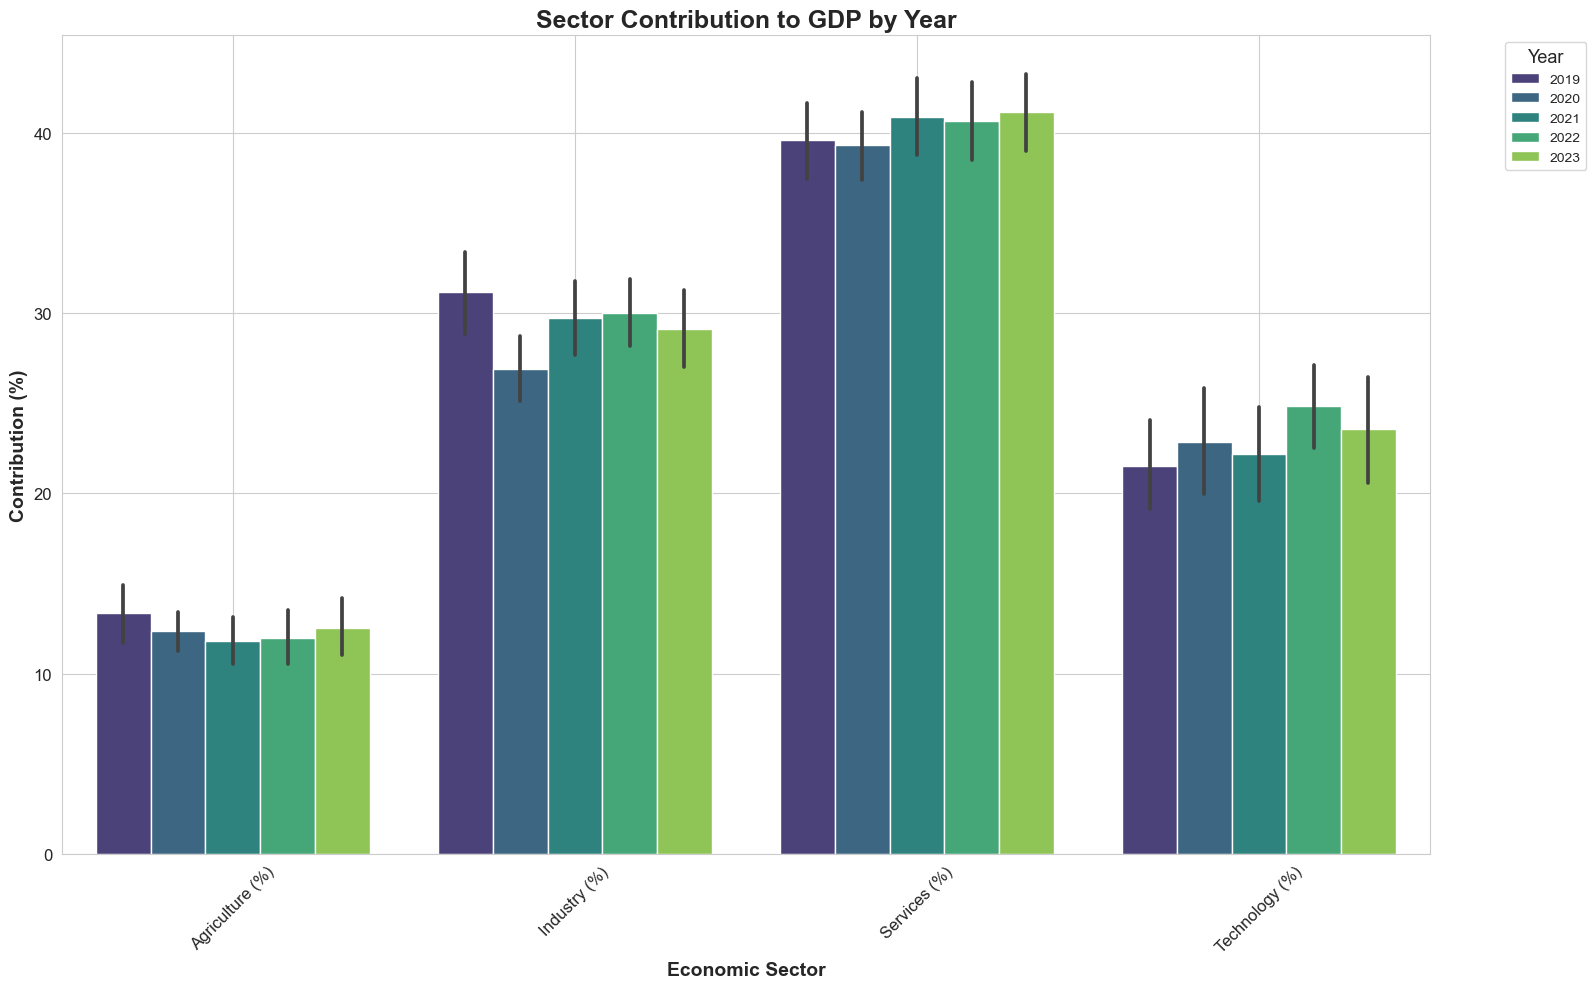

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transforming the data for plotting
df_melted = df.melt(id_vars=['City', 'Year', 'GDP (in billion $)'], 
                    value_vars=['Agriculture (%)', 'Industry (%)', 'Services (%)', 'Technology (%)'],
                    var_name='Sector',
                    value_name='Contribution (%)')

# Set the style and size
sns.set_style('whitegrid')
plt.figure(figsize=(16, 10))

# Bar plot to show sector contributions over the years for each city
sns.barplot(data=df_melted, x='Sector', y='Contribution (%)', hue='Year', palette='viridis')

# Add titles and labels
plt.title('Sector Contribution to GDP by Year', fontsize=18, fontweight='bold')
plt.xlabel('Economic Sector', fontsize=14, fontweight='bold')
plt.ylabel('Contribution (%)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set y-axis ticks font size
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

# Add grid lines
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


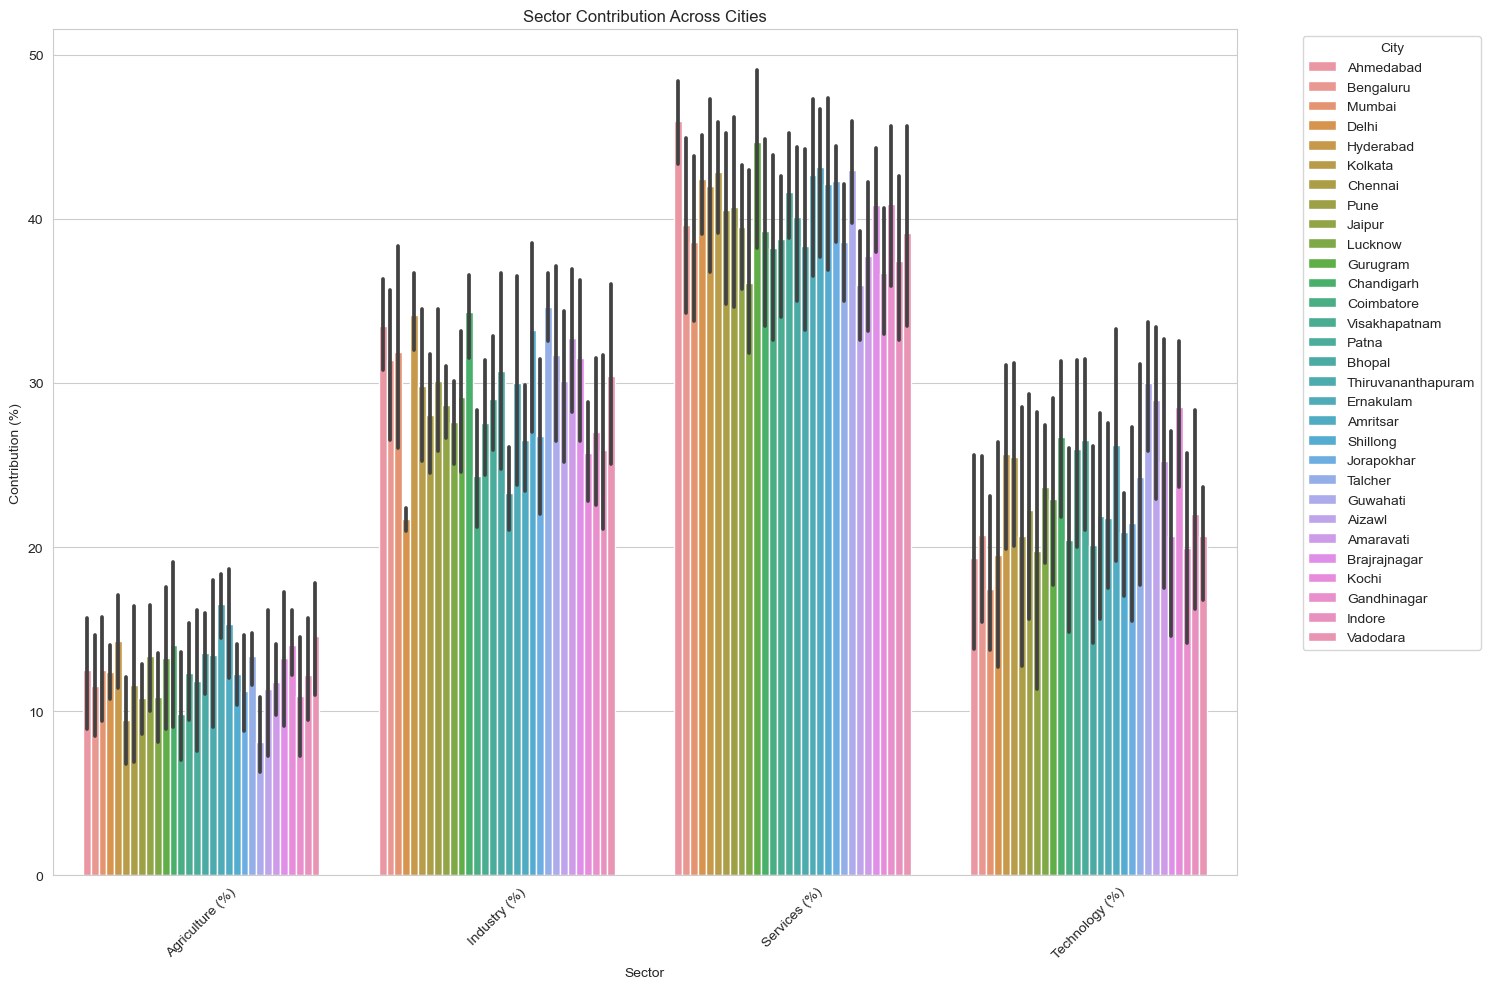

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Transforming the data for sector-wise analysis
df_melted = df.melt(id_vars=['City', 'Year'], 
                    value_vars=['Agriculture (%)', 'Industry (%)', 'Services (%)', 'Technology (%)'],
                    var_name='Sector',
                    value_name='Contribution')

# Clear any existing figures
plt.clf()            
plt.close('all')     

# Plotting sector contribution with sectors on the x-axis
plt.figure(figsize=(15, 10))  # Define the figure size
sns.barplot(data=df_melted, x='Sector', y='Contribution', hue='City')  # Switch axes
plt.title('Sector Contribution Across Cities')
plt.xlabel('Sector')  # X-axis label changed to 'Sector'
plt.ylabel('Contribution (%)')  # Y-axis label remains 'Contribution (%)'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


C:\Users\Sonu7\AppData\Local\Temp\ipykernel_18628\586362234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


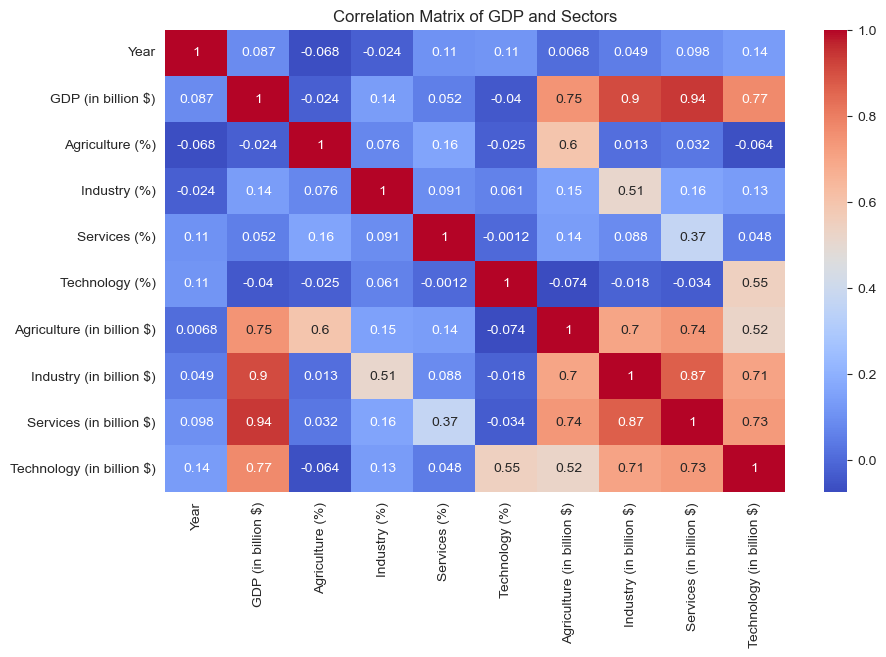

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of GDP and Sectors')
plt.show()

Trend Analysis and Forecasting:

Use Time Series analysis to forecast GDP or productivity metrics for future years:

        City  GDP (in billion $)  Agriculture (%)  Industry (%)  Services (%)  \
Year                                                                            
2019  Mumbai               192.5             11.6          39.8          32.0   
2020  Mumbai                90.3             14.8          25.1          39.3   
2021  Mumbai                89.7              6.7          33.1          32.8   
2022  Mumbai               142.2             17.3          21.9          46.8   
2023  Mumbai               294.1             12.0          39.5          42.1   

      Technology (%)  
Year                  
2019            15.2  
2020            16.1  
2021            14.9  
2022            12.4  
2023            28.5  


C:\ProgramData\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index

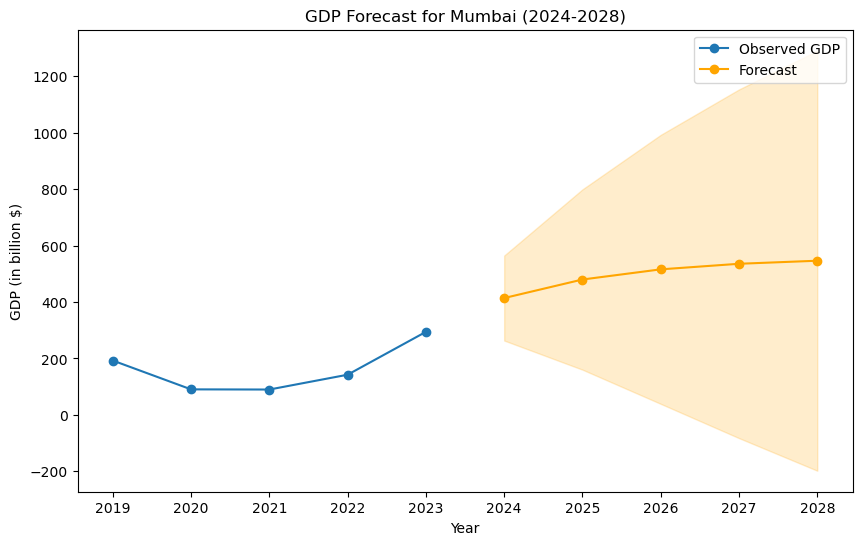

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame and you want to forecast GDP for 'Mumbai'
df = pd.read_csv('GDP_Sector_Income_2019_2023_30Cities.csv')  
df = df[df['City'] == 'Mumbai']  # Filter for Mumbai
df.set_index('Year', inplace=True)  # Set 'Year' as the index

# Check if the GDP data is correctly filtered
print(df.head())

# Extract the GDP series
city_data = df['GDP (in billion $)']

# Fitting the ARIMA model
model = ARIMA(city_data, order=(1, 1, 1))  # Adjust the order based on ACF/PACF analysis
model_fit = model.fit()

# Forecasting the next 5 years (2024 to 2028)
forecast_steps = 5
forecast = model_fit.get_forecast(steps=forecast_steps)

# Creating a range of forecast years (2024-2028)
forecast_years = pd.Series([2024, 2025, 2026, 2027, 2028])

# Extract forecasted values and confidence intervals
forecast_df = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(city_data, label='Observed GDP', marker='o')
plt.plot(forecast_years, forecast_df.values, label='Forecast', color='orange', marker='o')
plt.fill_between(forecast_years, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('GDP Forecast for Mumbai (2024-2028)')
plt.xlabel('Year')
plt.ylabel('GDP (in billion $)')
plt.xticks(list(city_data.index) + list(forecast_years))  # Combine actual years with forecasted years
plt.legend()
plt.show()


Insights and Interpretation

The insights from this project provide a comprehensive understanding of the economic dynamics of Indian cities, highlighting the importance of sectoral contributions and forecasting future growth. This information is valuable for stakeholders, including policymakers, investors, and city planners, to make data-driven decisions that support economic development and address challenges effectively.